In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=1500, n_features=2, n_informative=2,n_redundant=0, n_repeated=0,n_classes=2,n_clusters_per_class=1, weights=[0.9,0.1], class_sep=0.8)

In [4]:
df = pd.DataFrame(X,columns=['X1','X2'])
df['Target'] = y
df.head()

,X1,X2,Target
0,0.454988,0.533586,0
1,0.308432,0.895371,0
2,1.633898,0.905270,0
3,0.398322,0.592638,0
4,0.035632,-0.248262,1


In [5]:
df['Target'].value_counts()

0    1340
1     160
Name: Target, dtype: int64

### SMOTE

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
sm = SMOTE(random_state=0)
X_resample, y_resample = sm.fit_resample(X,y)
type(X_resample), type(y_resample)

(numpy.ndarray, numpy.ndarray)

In [9]:
df_new = pd.DataFrame(X_resample,columns=['X1','X2'])
df_new['Target'] = y_resample
df_new.head()

,X1,X2,Target
0,0.454988,0.533586,0
1,0.308432,0.895371,0
2,1.633898,0.905270,0
3,0.398322,0.592638,0
4,0.035632,-0.248262,1


In [10]:
df_new['Target'].value_counts()

0    1340
1    1340
Name: Target, dtype: int64

### Dùng Resampling

In [11]:
from sklearn.utils import resample

In [12]:
df_1 = df[df['Target'] == 1 ]
df_0 = df[df['Target'] == 0 ]

In [14]:
df_0.shape, df_1.shape

((1340, 3), (160, 3))

In [15]:
df_1_resample = resample(df_1,replace=True,n_samples=df_0.shape[0],random_state=0)

In [16]:
df_1_resample.shape

(1340, 3)

In [17]:
df_new2 = pd.concat([df_0,df_1_resample])
df_new2.head()

,X1,X2,Target
0,0.454988,0.533586,0
1,0.308432,0.895371,0
2,1.633898,0.905270,0
3,0.398322,0.592638,0
5,0.743808,0.231684,0


In [18]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2680 non-null   float64
 1   X2      2680 non-null   float64
 2   Target  2680 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 73.3 KB


### dùng RamdomOverSampler

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
rs = RandomOverSampler()

In [21]:
X2_resample, y2_resample = rs.fit_resample(X,y)

In [22]:
X2_resample.shape, y2_resample.shape

((2680, 2), (2680,))

In [23]:
df_new3 = pd.DataFrame(X2_resample, columns=['X1','X'])
df_new3['Target'] = y2_resample
df_new3.head()

,X1,X,Target
0,0.454988,0.533586,0
1,0.308432,0.895371,0
2,1.633898,0.905270,0
3,0.398322,0.592638,0
4,0.035632,-0.248262,1


In [24]:
df_new3['Target'].value_counts()

0    1340
1    1340
Name: Target, dtype: int64

In [25]:
from mpl_toolkits.mplot3d import Axes3D

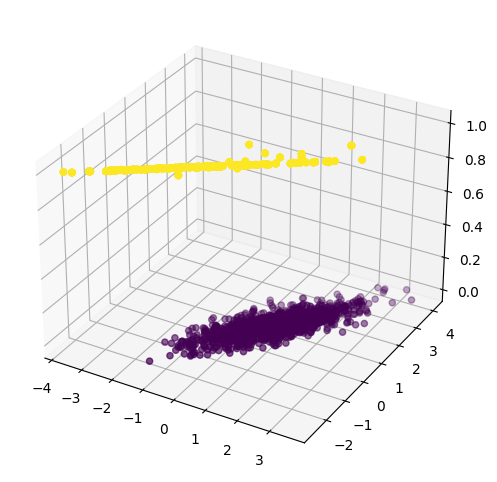

In [28]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111,projection='3d')
ax.scatter(df_new3['X1'],df_new3['X'],df_new3['Target'],c=df_new3['Target'])
plt.show()